# Setup

## Clone Repo

In [9]:
!rm -r cl_grid_world
!git clone https://github.com/LeroyChristopherDunn/CLGridWorld.git cl_grid_world

Cloning into 'cl_grid_world'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 637 (delta 16), reused 28 (delta 13), pack-reused 595
Receiving objects: 100% (637/637), 998.08 KiB | 3.39 MiB/s, done.
Resolving deltas: 100% (334/334), done.


## Build

In [10]:
!pip install /content/cl_grid_world

Processing ./cl_grid_world
  Stored in directory: /tmp/pip-ephem-wheel-cache-zo649fcc/wheels/b7/29/46/9056cae569a3bef9ce81e0b6e7b681e05fba9a0ec386b98f63
Successfully built gym-clgridworld
  Found existing installation: gym-clgridworld 1.0.0
    Uninstalling gym-clgridworld-1.0.0:
      Successfully uninstalled gym-clgridworld-1.0.0


# Demo

## Imports

In [ ]:
from cl_grid_world.clgridworld.grid_world_builder import InitialStateParams, GridWorldBuilder
from cl_grid_world.clgridworld.wrapper.distance_observation_wrapper import DistanceObservationWrapper
from cl_grid_world.clgridworld.wrapper.tuple_observation_wrapper import TupleObservationWrapper
from cl_grid_world.example.agent_trainer import AgentTrainer
from cl_grid_world.example.agents.policy import EpsGreedy
from cl_grid_world.example.agents.q_learning_agent import QLearningAgent

## Environment

In [0]:
# target task spec as defined in Source Task Sequencing,,, Narvekar et al 2017
params = InitialStateParams(shape=(10, 10), 
                            player=(1, 4), 
                            key=(7, 5), 
                            lock=(1, 1), 
                            pit_start=(4, 2),
                            pit_end=(4, 7))
env = GridWorldBuilder.create(params)

# transform state space to localized, distance based states
env = DistanceObservationWrapper(env)  

# convert states to tuples to make hashable for q learning agent
env = TupleObservationWrapper(env)  

## Agent 

In [0]:
seed = 0

policy = EpsGreedy(0.1)
# policy = EpsAnnealed(250)  # uncomment for annealed policy

agent = QLearningAgent(env.action_space, policy, discount_factor=1, seed=seed)

## Training

Environment initial state: 
[['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' 'L' '-' '-' 'P' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' 'B' '-' '-' '-' '-' '-' '-' 'B' '-']
 ['-' '-' 'X' 'X' 'X' 'X' 'X' 'X' '-' '-']
 ['-' 'B' '-' '-' '-' '-' '-' '-' 'B' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' 'K' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']
 ['-' '-' '-' '-' '-' '-' '-' '-' '-' '-']]
has_key: false

episode 0 avg reward: -2160.0 avg steps 197.0
episode 200 avg reward: -3110.2 avg steps 330.915
episode 400 avg reward: -2242.1 avg steps 284.38
episode 600 avg reward: -1322.95 avg steps 219.0
episode 800 avg reward: -555.6 avg steps 150.32
episode 1000 avg reward: -50.85 avg steps 110.195
episode 1200 avg reward: 380.25 avg steps 87.875
episode 1400 avg reward: 753.55 avg steps 63.985
episode 1600 avg reward: 968.45 avg steps 42.84
episode 1800 avg reward: 1114.3 avg steps 36.295
episode 2000 avg reward: 1193.5 avg st

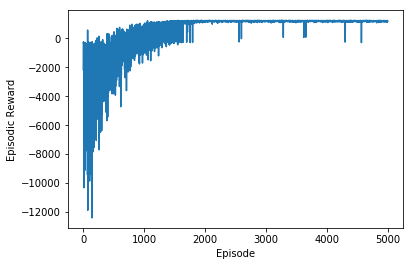

time taken: 11.555775880813599 seconds


In [14]:
AgentTrainer(env, agent).train(seed, 
                               num_episodes=5000, 
                               max_steps_per_episode=10000, 
                               episode_log_interval=200)
